In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation

## Overview

In [2]:
master=pd.read_csv('cs-training.csv')
data=master.copy()

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Data explanation
1. SeriousDlqin2yrs  : Person experienced 90 days past due delinquency or worse 
2. RevolvingUtilizationOfUnsecuredLines  :Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
3. Age  : Age of borrower in years
4. NumberOfTime30-59DaysPastDueNotWorse  : Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. DebtRatio  : Monthly debt payments, alimony,living costs divided by monthy gross income
6. MonthlyIncome  :  MonthlyIncome
7. NumberOfOpenCreditLinesAndLoans  :  Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
8. NumberOfTimes90DaysLate  :  Number of times borrower has been 90 days or more past due.
9. NumberRealEstateLoansOrLines  :  Number of mortgage and real estate loans including home equity lines of credit
10. NumberOfTime60-89DaysPastDueNotWorse  :  Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
11. NumberOfDependents  :  Number of dependents in family excluding themselves (spouse, children etc.)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [5]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

MonthlyIncome and Number of Dependents have some null value, I'll fill it later

In [6]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


from the description table above, there are some important information:
1. the target(seriousdlqin2yrs) : based from the mean value, mostly filled by 0 value. Imbalance data
2. Almost all of the feature have outliers. need to clean it before processing

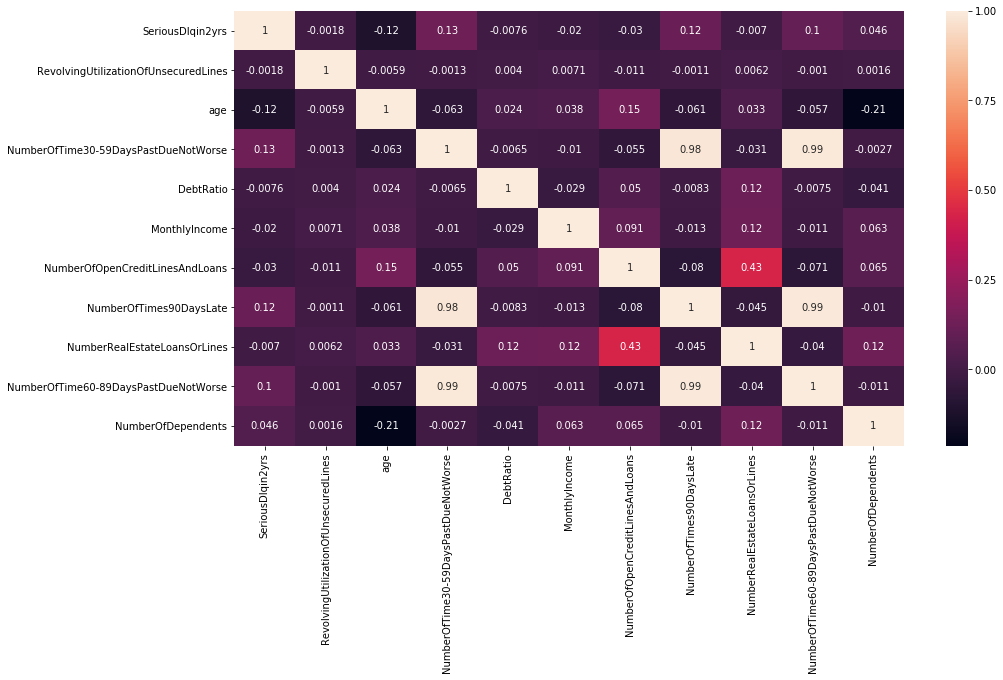

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

there are strong correlation between NumberOfTIme30-59DaysPastDueNotWorse, 60-89, 90. Let's check deeper

## Check each feature

In [8]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Default or not

In [9]:
df_default=data.copy()

In [10]:
df_default[df_default['SeriousDlqin2yrs']==1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10026.0,10026.000000,10026.000000,10026.00000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.000000,9847.000000
mean,1.0,4.367282,45.926591,2.38849,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208
std,0.0,131.835778,12.916289,11.73451,1238.360283,6171.719674,5.653601,11.762760,1.425723,11.753068,1.219367
min,1.0,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.398219,36.000000,0.00000,0.193979,2963.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.838853,45.000000,0.00000,0.428227,4500.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,1.000000,54.000000,2.00000,0.892371,6800.000000,11.000000,1.000000,2.000000,1.000000,2.000000
max,1.0,8328.000000,101.000000,98.00000,38793.000000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


In [11]:
df_default[df_default['SeriousDlqin2yrs']==0].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,139974.0,139974.000000,139974.000000,139974.000000,139974.000000,1.119120e+05,139974.000000,139974.000000,139974.000000,139974.000000,136229.000000
mean,0.0,6.168855,52.751375,0.280109,357.151168,6.747838e+03,8.493620,0.135225,1.020368,0.126666,0.743417
std,0.0,256.126350,14.791079,2.946075,2083.282060,1.481350e+04,5.105229,2.909088,1.105512,2.900930,1.105895
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.026983,42.000000,0.000000,0.173707,3.461000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.133288,52.000000,0.000000,0.362659,5.466000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.487686,63.000000,0.000000,0.865608,8.333000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.0,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


the summary from description table above, the default case have some characteristics:
1. bigger RUUL value
2. younger age
3. lower debt ratio
4. less monthly income
5. less Number of open credit lines and loans
6. slightly bigger number of dependents value

for the number of late it's a bit hard to interprete since the data has many 96 and 98 value so it'll ruin the description. 
on the other hand, both of default and not case just have slightly difference in Number Real Estate Loans Or lines

In [122]:
# sns.pairplot(df_default, hue='SeriousDlqin2yrs')

### RUUL

#### Upnormal Value

In [12]:
data.quantile(0.95)

SeriousDlqin2yrs                            1.0
RevolvingUtilizationOfUnsecuredLines        1.0
age                                        78.0
NumberOfTime30-59DaysPastDueNotWorse        2.0
DebtRatio                                2449.0
MonthlyIncome                           14587.6
NumberOfOpenCreditLinesAndLoans            18.0
NumberOfTimes90DaysLate                     1.0
NumberRealEstateLoansOrLines                3.0
NumberOfTime60-89DaysPastDueNotWorse        1.0
NumberOfDependents                          3.0
Name: 0.95, dtype: float64

In [13]:
data[data['RevolvingUtilizationOfUnsecuredLines']<=1]['SeriousDlqin2yrs'].describe()

count    146679.000000
mean          0.059920
std           0.237339
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [14]:
data[data['RevolvingUtilizationOfUnsecuredLines']<=1]['SeriousDlqin2yrs'].value_counts()

0    137890
1      8789
Name: SeriousDlqin2yrs, dtype: int64

after set a quantile of 0.95 and check the data, almost all the data with value <= 1 has a really little tendency to become defaulting

let's check data with higher RUUL

In [15]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>1)&(data['RevolvingUtilizationOfUnsecuredLines']<=5)]['SeriousDlqin2yrs'].describe()

count    3067.000000
mean        0.396805
std         0.489315
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [16]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>1)&(data['RevolvingUtilizationOfUnsecuredLines']<=5)]['SeriousDlqin2yrs'].value_counts()

0    1850
1    1217
Name: SeriousDlqin2yrs, dtype: int64

the defaulting's tendency become higher

let's check the higher interval

In [17]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>5)&(data['RevolvingUtilizationOfUnsecuredLines']<=10)]['SeriousDlqin2yrs'].describe()

count    13.000000
mean      0.230769
std       0.438529
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [18]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>5)&(data['RevolvingUtilizationOfUnsecuredLines']<=10)]['SeriousDlqin2yrs'].value_counts()

0    10
1     3
Name: SeriousDlqin2yrs, dtype: int64

the mean value is slightly decrease, but still tolerable. let's check higher interval

In [19]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>10)]['SeriousDlqin2yrs'].describe()

count    241.000000
mean       0.070539
std        0.256587
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [20]:
data[(data['RevolvingUtilizationOfUnsecuredLines']>10)]['SeriousDlqin2yrs'].value_counts()

0    224
1     17
Name: SeriousDlqin2yrs, dtype: int64

from 10 and higher, the tendency is shifted, the 0 value become more abundant than 1. this would be ruined our data. I'll drop it anyway

In [21]:
data=data[(data['RevolvingUtilizationOfUnsecuredLines']<=10)]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149759 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        149759 non-null int64
RevolvingUtilizationOfUnsecuredLines    149759 non-null float64
age                                     149759 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149759 non-null int64
DebtRatio                               149759 non-null float64
MonthlyIncome                           120096 non-null float64
NumberOfOpenCreditLinesAndLoans         149759 non-null int64
NumberOfTimes90DaysLate                 149759 non-null int64
NumberRealEstateLoansOrLines            149759 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149759 non-null int64
NumberOfDependents                      145848 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


we lost about 241 data, but it's okay instead of keeping bad data

#### Interpretation without outlier

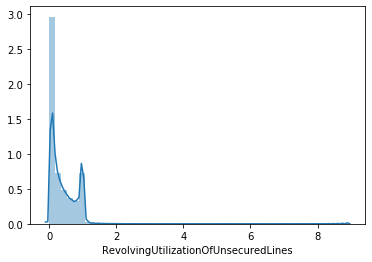

In [23]:
sns.distplot(data['RevolvingUtilizationOfUnsecuredLines'])

In [24]:
IQR=data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['75%']-data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['25%']
upper=data['RevolvingUtilizationOfUnsecuredLines'].describe().loc['75%']+1.5*IQR

In [25]:
interpretation=data[data['RevolvingUtilizationOfUnsecuredLines']<upper]

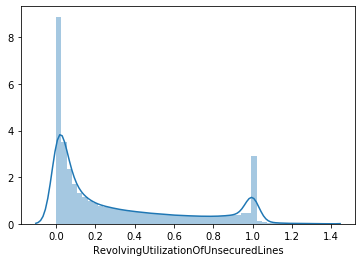

In [26]:
sns.distplot(interpretation['RevolvingUtilizationOfUnsecuredLines'])

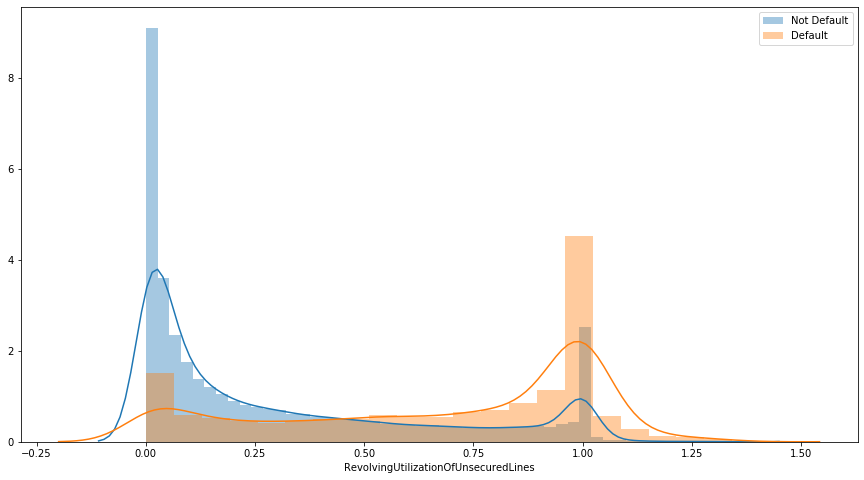

In [126]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['RevolvingUtilizationOfUnsecuredLines'], label=['Not Default'])
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['RevolvingUtilizationOfUnsecuredLines'], label=['Default'])
plt.legend()

From the graph above, the data have a bimodal distribution where has 2 peaks, in ~0.05 and ~1. Most people have used 5% from their total credit card's limit while the other has used almost all of the limit.
Moreover, the bimodal distribution represents the separation between defaulting and not, with bigger RUUL increase the tendency of people to be defaulting.

### DebtRatio

#### Upnormal Value

In [28]:
data['DebtRatio'].describe()

count    149759.000000
mean        352.652789
std        2038.203228
min           0.000000
25%           0.174960
50%           0.366483
75%           0.866946
max      329664.000000
Name: DebtRatio, dtype: float64

In [29]:
data.quantile(0.95)

SeriousDlqin2yrs                            1.0
RevolvingUtilizationOfUnsecuredLines        1.0
age                                        78.0
NumberOfTime30-59DaysPastDueNotWorse        2.0
DebtRatio                                2447.1
MonthlyIncome                           14583.0
NumberOfOpenCreditLinesAndLoans            18.0
NumberOfTimes90DaysLate                     1.0
NumberRealEstateLoansOrLines                3.0
NumberOfTime60-89DaysPastDueNotWorse        1.0
NumberOfDependents                          3.0
Name: 0.95, dtype: float64

In [30]:
data[data['DebtRatio']>1]['age'].count()

35060

we have 35000 data with debt ratio > 1, which means they debt more than they earn. A more interesting fact that more than 5% of the data have a debt ratio of more than 2447.1. let's check deeper

In [31]:
data[data['DebtRatio']>2447.1]['SeriousDlqin2yrs'].value_counts()

0    7074
1     414
Name: SeriousDlqin2yrs, dtype: int64

In [32]:
data[data['DebtRatio']>2447.1]['MonthlyIncome'].value_counts()

0.0    347
1.0     32
Name: MonthlyIncome, dtype: int64

In [33]:
data[data['DebtRatio']>2447.1]['MonthlyIncome'].isna().sum()

7109

from 5% of our data, which has more than 2447.1 debtratio, all of the data is filled either with 0,1 or nan value. I'll assume it as entry error

In [34]:
data=data[data['DebtRatio']<=2447.1]

#### Interpretation without outlier

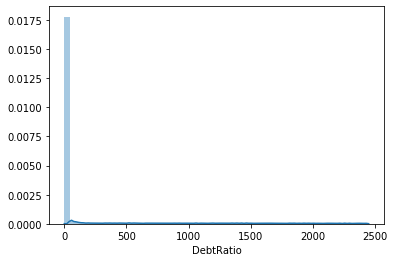

In [35]:
sns.distplot(data['DebtRatio'])

In [36]:
IQR=(data['DebtRatio'].describe().loc['75%'])-(data['DebtRatio'].describe().loc['25%'])
upper=data['DebtRatio'].describe().loc['75%']+1.5*IQR

In [37]:
interpretation=interpretation[interpretation['DebtRatio']<upper]

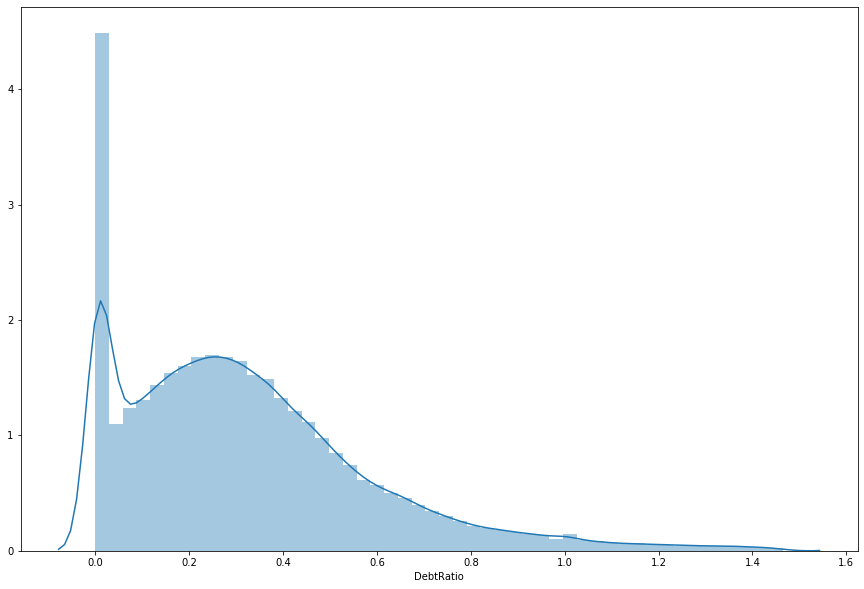

In [130]:
plt.figure(figsize=(15,10))
sns.distplot(interpretation['DebtRatio'])

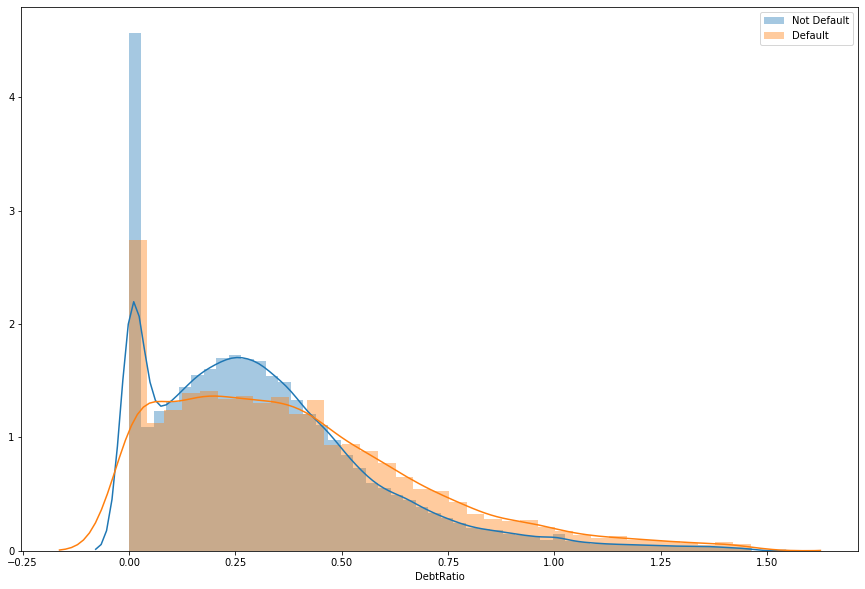

In [129]:
plt.figure(figsize=(15,10))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['DebtRatio'], label=['Not Default'])
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['DebtRatio'], label='Default')
plt.legend()

the debt ratio graph doesn't show any distinction between defaulting and not

### Number of late

#### Upnormal Value

In [40]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     119576
1      15204
2       4339
3       1651
4        692
5        315
98       264
6        131
7         52
8         24
9         11
96         5
10         3
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

Seeing the data has so many 98 and 96 value while the 14-95 empty is interesting

In [41]:
data[data['NumberOfTime30-59DaysPastDueNotWorse']>95][['SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].head()

,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
1733,1,98,98,98
2286,0,98,98,98
3884,0,98,98,98
4417,0,98,98,98
4705,0,98,98,98


In [42]:
data[data['NumberOfTime30-59DaysPastDueNotWorse']>95][['SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']].describe()

,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


based of the table above, all of NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, and NumberOfTime60-89DaysPastDueNotWorse have same value when the value is above 95. Furthermore, from the SeriousDlqin2yrs describe, these data have 0.54 mean, which is interpreting that these data have almost balanced between default and not so I will keep the data. In my opinion, these 96 or 98 value is a kind of label or something like that.

#### Interpretation

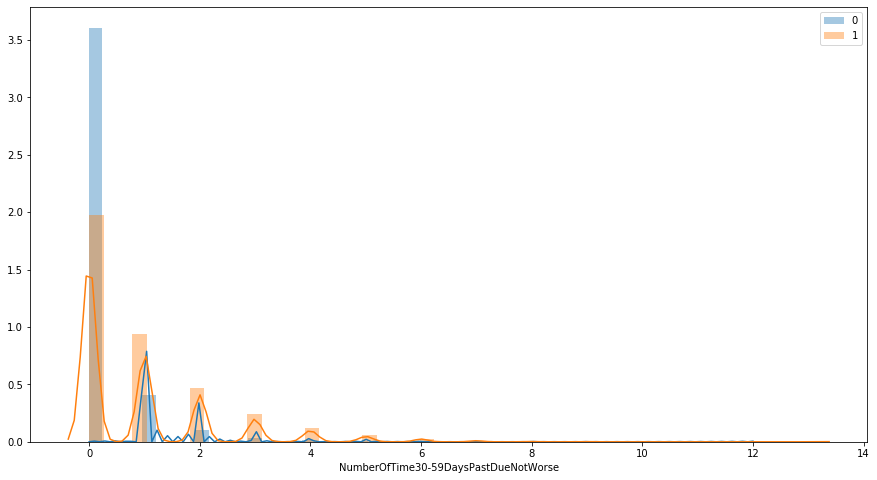

In [161]:
plt.figure(figsize=(15,8))
sns.distplot(data[(data['NumberOfTime30-59DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==0)]['NumberOfTime30-59DaysPastDueNotWorse'], label='0')
sns.distplot(data[(data['NumberOfTime30-59DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==1)]['NumberOfTime30-59DaysPastDueNotWorse'], label='1')
plt.legend()

In [ ]:
data[(data['NumberOfTime60-89DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==0)]

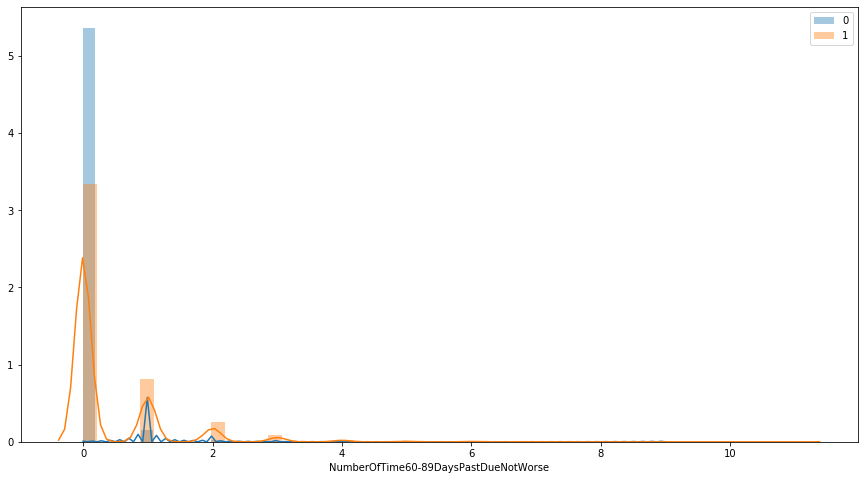

In [158]:
plt.figure(figsize=(15,8))
sns.distplot(data[(data['NumberOfTime60-89DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==0)]['NumberOfTime60-89DaysPastDueNotWorse'], label='0')
sns.distplot(data[(data['NumberOfTime60-89DaysPastDueNotWorse']<90) & (data['SeriousDlqin2yrs']==1)]['NumberOfTime60-89DaysPastDueNotWorse'], label='1')
plt.legend()

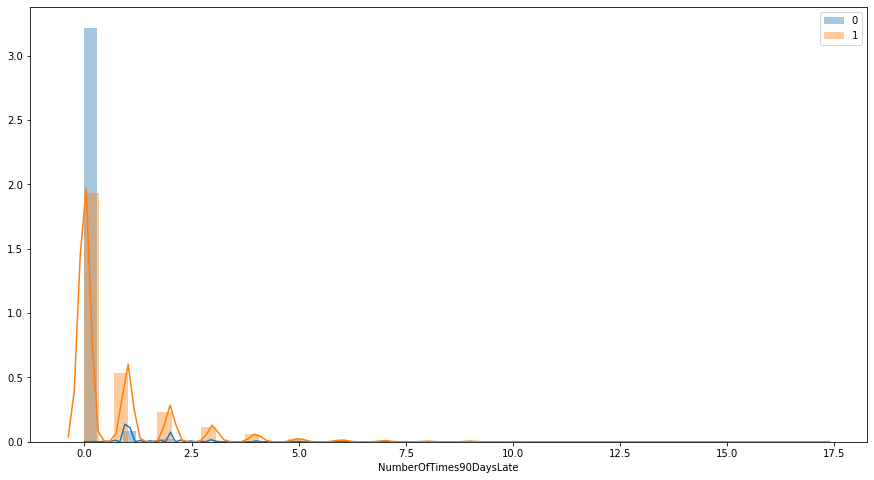

In [160]:
plt.figure(figsize=(15,8))
sns.distplot(data[(data['NumberOfTimes90DaysLate']<90) & (data['SeriousDlqin2yrs']==0)]['NumberOfTimes90DaysLate'], label='0')
sns.distplot(data[(data['NumberOfTimes90DaysLate']<90) & (data['SeriousDlqin2yrs']==1)]['NumberOfTimes90DaysLate'], label='1')
plt.legend()

In [43]:
data['NumberOfTimes90DaysLate'].describe()

count    142271.000000
mean          0.277231
std           4.279764
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

because the 25% and 75% value are 0, so if I remove the outlier, it would be only leaving the 0 value

to mix these 3 columns, I'll make a new feature which worth the sum from those columns

In [44]:
mix=data.copy()

In [45]:
mix['total']=mix['NumberOfTimes90DaysLate']+mix['NumberOfTime60-89DaysPastDueNotWorse']+mix['NumberOfTime30-59DaysPastDueNotWorse']

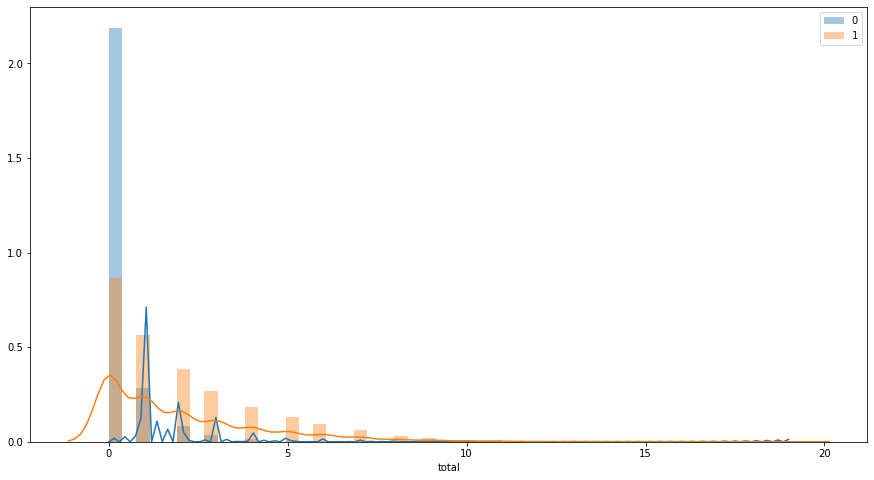

In [163]:
plt.figure(figsize=(15,8))
sns.distplot(mix[(mix['SeriousDlqin2yrs']==0)&(mix['total']<100)]['total'],label=0)
sns.distplot(mix[(mix['SeriousDlqin2yrs']==1)&(mix['total']<100)]['total'],label=1)
plt.legend()

the total value of the number of late also doesn't give any significant result.

### Monthly Income

In [47]:
data['MonthlyIncome'].describe()

count    1.197170e+05
mean     6.688740e+03
std      1.441059e+04
min      0.000000e+00
25%      3.407000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

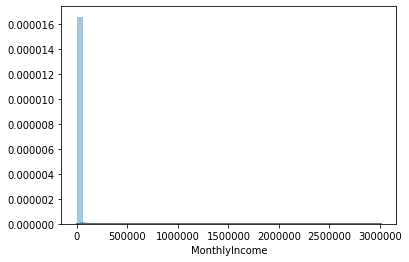

In [48]:
sns.distplot(data['MonthlyIncome'].dropna())

the data has many people with 0 income and a big outlier, up to 3000000. It's become hard to analyzed. I'll drop the 0 value and outlier

In [49]:
interpretation['MonthlyIncome'].fillna(interpretation['MonthlyIncome'].median(),inplace=True)

In [50]:
IQR=(data['MonthlyIncome'].describe().loc['75%'])-(data['MonthlyIncome'].describe().loc['25%'])
upper=data['MonthlyIncome'].describe().loc['75%']+1.5*IQR

In [51]:
interpretation=interpretation[(interpretation['MonthlyIncome']>0)&(interpretation['MonthlyIncome']<upper)]

In [52]:
interpretation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112303 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        112303 non-null int64
RevolvingUtilizationOfUnsecuredLines    112303 non-null float64
age                                     112303 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    112303 non-null int64
DebtRatio                               112303 non-null float64
MonthlyIncome                           112303 non-null float64
NumberOfOpenCreditLinesAndLoans         112303 non-null int64
NumberOfTimes90DaysLate                 112303 non-null int64
NumberRealEstateLoansOrLines            112303 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    112303 non-null int64
NumberOfDependents                      111827 non-null float64
dtypes: float64(4), int64(7)
memory usage: 10.3 MB


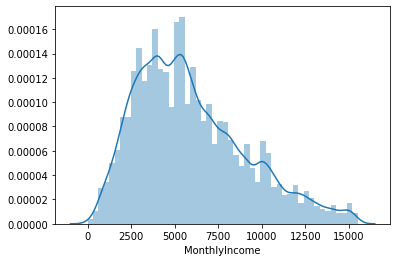

In [53]:
sns.distplot(interpretation['MonthlyIncome'])

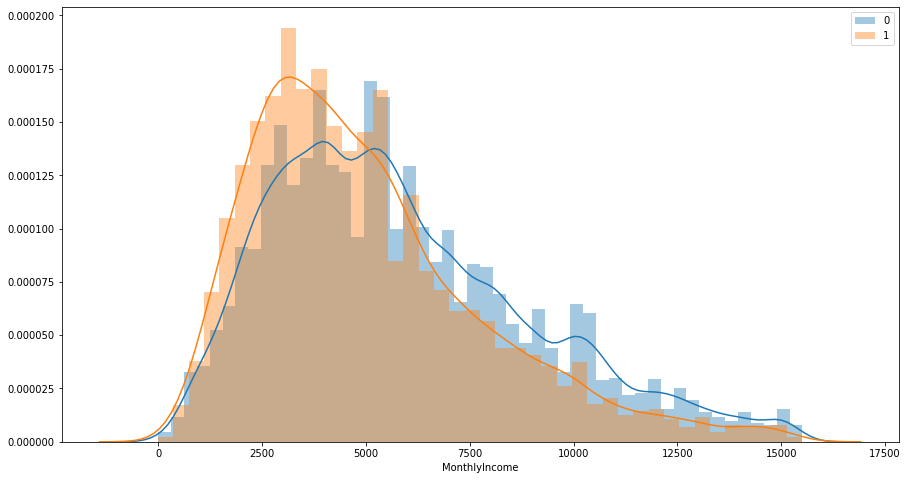

In [165]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['MonthlyIncome'], label='0')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['MonthlyIncome'], label='1')
plt.legend()

Monthly Income also doesn't give any significant distinction between default and not

### NumberOfOpenCreditLinesAndLoans

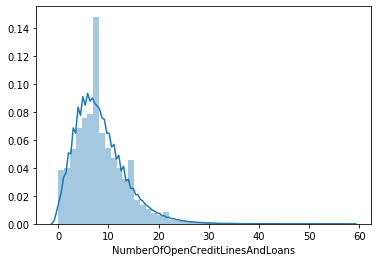

In [55]:
sns.distplot(data['NumberOfOpenCreditLinesAndLoans'])

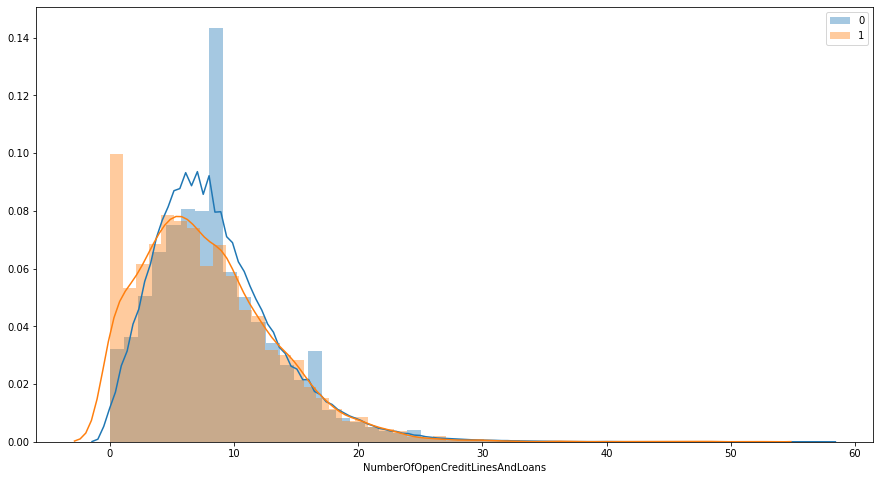

In [164]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['NumberOfOpenCreditLinesAndLoans'], label='0')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['NumberOfOpenCreditLinesAndLoans'], label='1')
plt.legend()

NumberOfOpenCreditLinesAndLoans doesn't have significant distinguish between default and not

### NumberRealEstateLoansOrLines

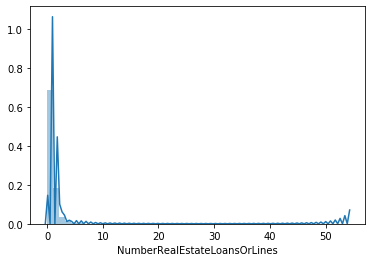

In [57]:
sns.distplot(data['NumberRealEstateLoansOrLines'])

In [58]:
IQR=data['NumberRealEstateLoansOrLines'].describe().loc['75%']-data['NumberRealEstateLoansOrLines'].describe().loc['25%']

In [59]:
upper=data['NumberRealEstateLoansOrLines'].describe().loc['75%']+1.5*IQR

In [60]:
interpretation=interpretation[interpretation['NumberRealEstateLoansOrLines']<upper]

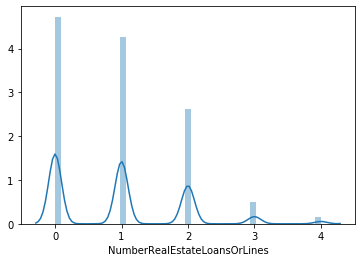

In [61]:
sns.distplot(interpretation['NumberRealEstateLoansOrLines'])

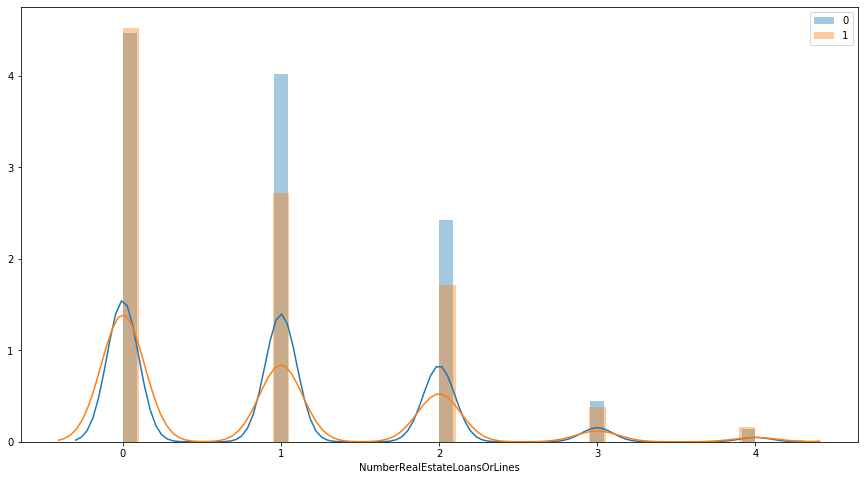

In [166]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['NumberRealEstateLoansOrLines'], label='0')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['NumberRealEstateLoansOrLines'], label='1')
plt.legend()

This feature also doesn't show any separation between default or not

### Number of dependents

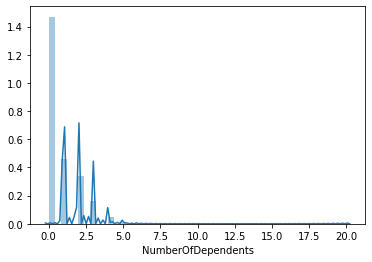

In [63]:
sns.distplot(data['NumberOfDependents'].dropna())

In [64]:
IQR=data['NumberOfDependents'].describe().loc['75%']-data['NumberOfDependents'].describe().loc['25%']

In [65]:
upper=data['NumberOfDependents'].describe().loc['75%']+1.5*IQR

In [66]:
interpretation=interpretation[interpretation['NumberOfDependents']<upper]

In [67]:
interpretation.fillna(interpretation['NumberOfDependents'].mode(),inplace=True)

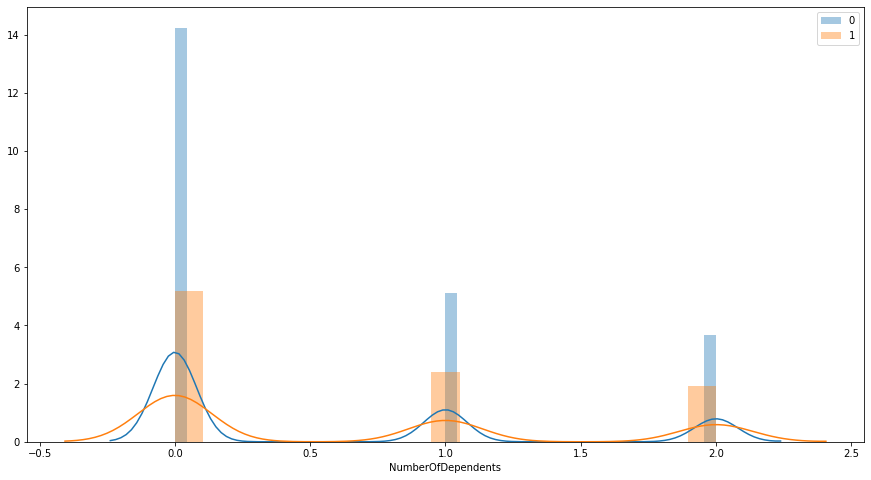

In [167]:
plt.figure(figsize=(15,8))
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==0]['NumberOfDependents'],label='0')
sns.distplot(interpretation[interpretation['SeriousDlqin2yrs']==1]['NumberOfDependents'],label='1')
plt.legend()

Number of dependents also doesn't give us any meaningful information

### Age

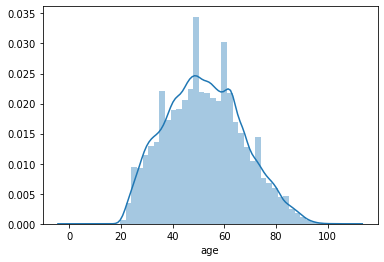

In [69]:
sns.distplot(data['age'])

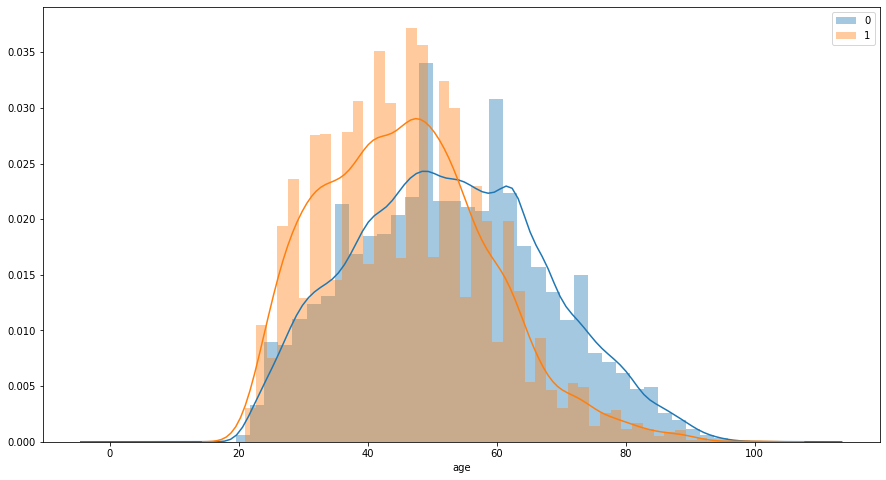

In [170]:
plt.figure(figsize=(15,8))
sns.distplot(data[data['SeriousDlqin2yrs']==0]['age'],label=0)
sns.distplot(data[data['SeriousDlqin2yrs']==1]['age'],label=1)
plt.legend()

based on the graph before, people with a younger age have a tendency to default higher than people with older age. I'll just wonder what is the difference between old people and young people

In [71]:
df_age=data.copy()

In [72]:
df_age['class_age']=df_age['age'].apply(lambda x: '0-10' if x>=0 and x<=10 else
                                                   '11-20' if x>=11 and x<=20 else
                                                   '21-30' if x>=21 and x<=30 else
                                                   '31-40' if x>=31 and x<=40 else
                                                   '41-50' if x>=41 and x<=50 else
                                                   '51-60' if x>=51 and x<=60 else
                                                   '61-70' if x>=61 and x<=70 else
                                                   '71-80' if x>=71 and x<=80 else
                                                   '>80')

Text(0.5, 1.0, 'Distribution of class_age')

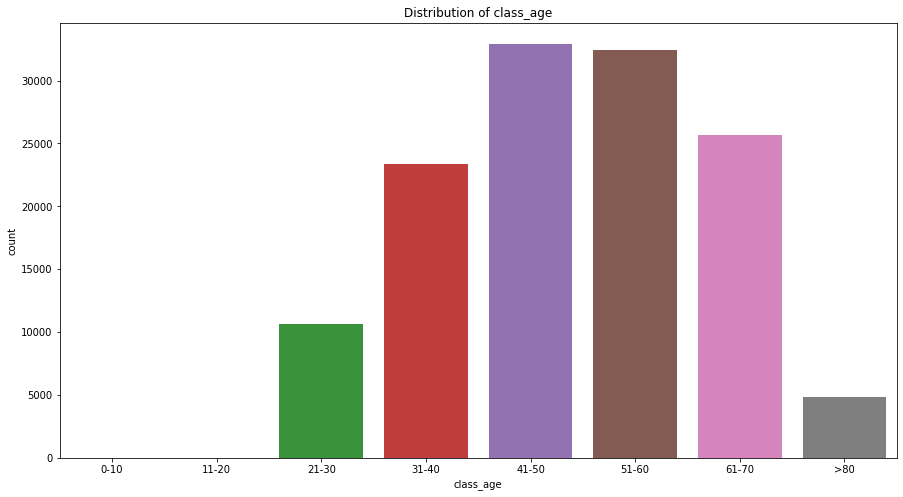

In [174]:
plt.figure(figsize=(15,8))
sns.countplot(df_age['class_age'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','>80'])
plt.title('Distribution of class_age')
        

Text(0.5, 1.0, 'tendency to become default')

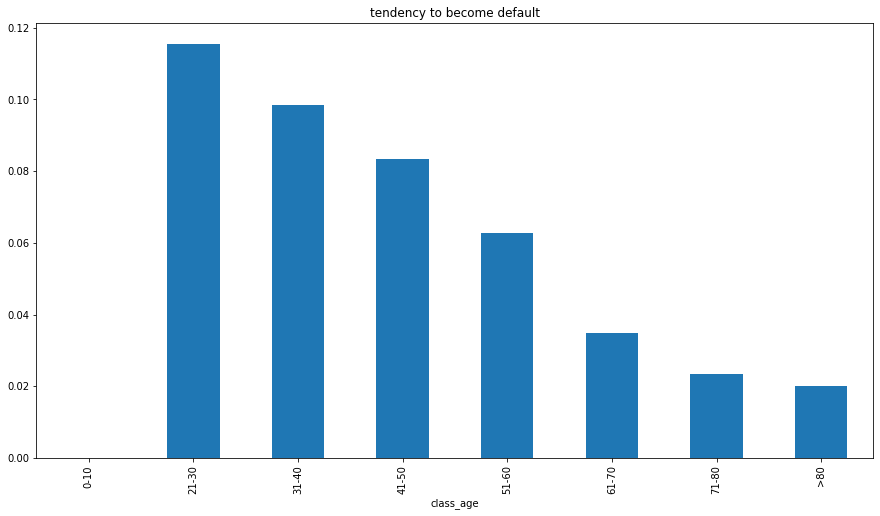

In [176]:
plt.figure(figsize=(15,8))
(df_age.groupby('class_age').mean()['SeriousDlqin2yrs']).plot(kind='bar')
plt.title('tendency to become default')

In [75]:
df_age[df_age['class_age']=='21-30'].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,9038.000000,10661.000000,10661.000000,10661.000000,10661.000000,10243.000000
mean,0.115561,0.511121,26.928618,1.607823,68.470170,3225.587741,4.677141,1.529031,0.211988,1.468905,0.332910
std,0.319713,0.427994,2.475976,11.528663,256.437596,3206.180912,3.558368,11.537134,0.551044,11.535202,0.749717
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.089820,25.000000,0.000000,0.061652,1600.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.448885,27.000000,0.000000,0.196436,2787.500000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.988586,29.000000,0.000000,0.539592,4200.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.599600,30.000000,98.000000,2419.000000,159791.000000,31.000000,98.000000,7.000000,98.000000,7.000000


In [76]:
df_age[df_age['class_age']=='>80'].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,3102.000000,4874.000000,4874.000000,4874.000000,4874.000000,4347.000000
mean,0.020107,0.120886,85.329709,0.099918,92.536963,5360.447453,6.921420,0.017439,0.338326,0.021133,0.103520
std,0.140380,0.249384,3.776355,0.442541,319.279920,12854.506098,4.724004,0.169206,0.673301,0.169996,0.330048
min,0.000000,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.005853,82.000000,0.000000,0.006129,2700.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.021856,85.000000,0.000000,0.181989,4166.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.073718,88.000000,0.000000,9.000000,6368.500000,9.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.867110,109.000000,8.000000,2437.000000,629000.000000,40.000000,4.000000,9.000000,5.000000,4.000000


there are some difference between young people and old people:
1. younger people have a tendency to have bigger RUUL, which means they use more than half of their credit card's limit
2. in the debt ratio feature, older people have bigger value rather than younger people. It means they have more expenses to be paid each month
3. older people have more monthly income. no surprise
4. from the number of Open Credit Lines and Loans, older people have more
5. older people have slightly bigger value in NumberRealEstateLoansorLines 
6. older people have a fewer number of dependents.
7. overall, younger people have more number of late rather than older people

by number, older people have bigger expenses each month for property, but they have better management in order to adjust their expenses each month and pay the debt on time. While on the other hand, people with younger age have less expense but have more number of late payment, although they have more dependents

## Fill NA

### MonthlyIncome

In [77]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22554
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3407
dtype: int64

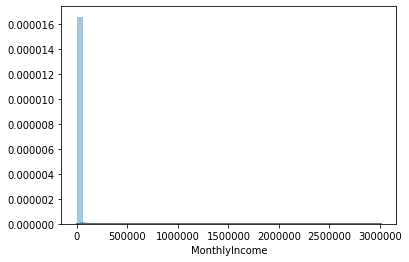

In [78]:
sns.distplot(data['MonthlyIncome'].dropna())

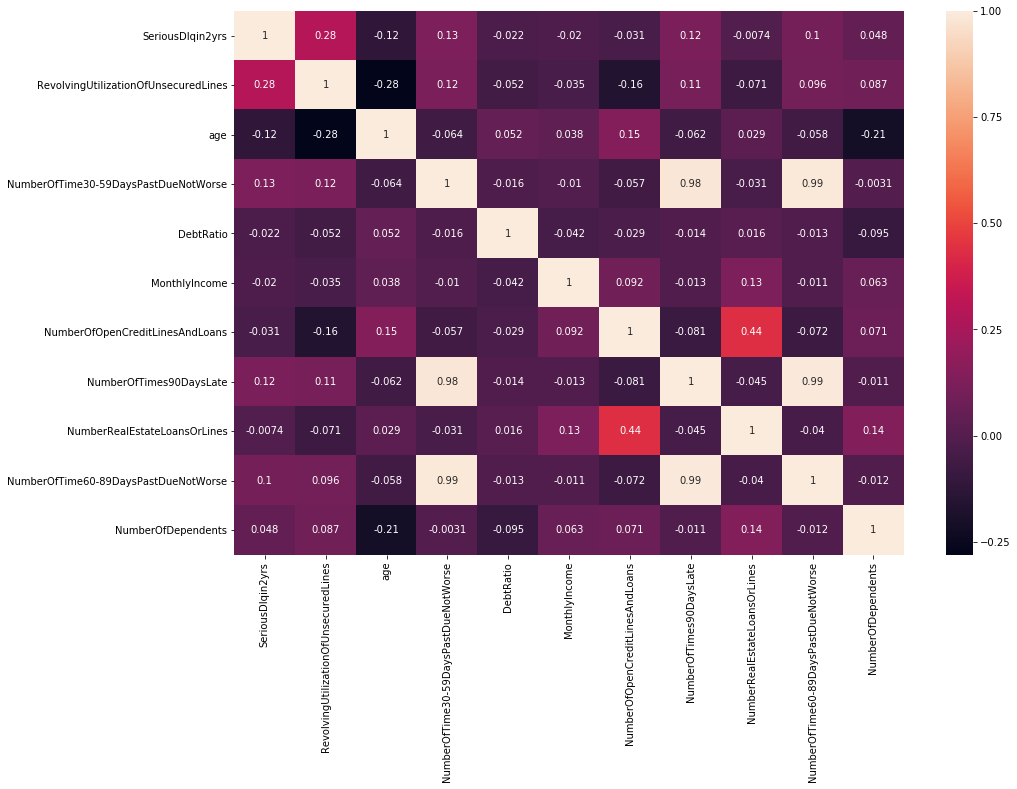

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

According to the heatmap, none of the feature is has strong correlation with monthlyincome, so predicting the monthly income
will useless. I'll try another method

In [80]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,142271.000000,142271.000000,142271.000000,142271.000000,142271.000000,1.197170e+05,142271.000000,142271.000000,142271.000000,142271.000000,138864.000000
mean,0.067442,0.322871,52.233245,0.429104,138.926914,6.688740e+03,8.344568,0.277231,0.970261,0.250311,0.768781
std,0.250786,0.367780,14.942066,4.301391,441.290287,1.441059e+04,5.125080,4.279764,1.103994,4.265658,1.118817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029313,41.000000,0.000000,0.165040,3.407000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.151670,52.000000,0.000000,0.345352,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.557748,63.000000,0.000000,0.685032,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,8.851852,109.000000,98.000000,2447.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


since the data has a big value of outliers, I decided to fill na value with the median

In [81]:
data['MonthlyIncome']=data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

### Number of Dependents

In [82]:
# data[pd.isna(data['NumberOfDependents'])]

In [83]:
data.corr()['NumberOfDependents']

SeriousDlqin2yrs                        0.047756
RevolvingUtilizationOfUnsecuredLines    0.087023
age                                    -0.214633
NumberOfTime30-59DaysPastDueNotWorse   -0.003119
DebtRatio                              -0.094858
MonthlyIncome                           0.066291
NumberOfOpenCreditLinesAndLoans         0.070839
NumberOfTimes90DaysLate                -0.010927
NumberRealEstateLoansOrLines            0.141528
NumberOfTime60-89DaysPastDueNotWorse   -0.011659
NumberOfDependents                      1.000000
Name: NumberOfDependents, dtype: float64

In [84]:
data['NumberOfDependents'].value_counts()

0.0     81655
1.0     25560
2.0     18822
3.0      9104
4.0      2761
5.0       723
6.0       155
7.0        50
8.0        24
9.0         4
10.0        4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

for this feature, the mode is 0, so I'll fill the na with its mode

In [85]:
data['NumberOfDependents']=data['NumberOfDependents'].fillna(0)

In [86]:
data['NumberOfDependents'].isna().sum()

0

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142271 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        142271 non-null int64
RevolvingUtilizationOfUnsecuredLines    142271 non-null float64
age                                     142271 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142271 non-null int64
DebtRatio                               142271 non-null float64
MonthlyIncome                           142271 non-null float64
NumberOfOpenCreditLinesAndLoans         142271 non-null int64
NumberOfTimes90DaysLate                 142271 non-null int64
NumberRealEstateLoansOrLines            142271 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142271 non-null int64
NumberOfDependents                      142271 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.0 MB


## Distribution

In [88]:
# sns.pairplot(data)

## Prepare Data

### Data 1

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142271 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        142271 non-null int64
RevolvingUtilizationOfUnsecuredLines    142271 non-null float64
age                                     142271 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142271 non-null int64
DebtRatio                               142271 non-null float64
MonthlyIncome                           142271 non-null float64
NumberOfOpenCreditLinesAndLoans         142271 non-null int64
NumberOfTimes90DaysLate                 142271 non-null int64
NumberRealEstateLoansOrLines            142271 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142271 non-null int64
NumberOfDependents                      142271 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.0 MB


### Data2, no fil na, outlier still found

In [90]:
data2=master.dropna()

In [91]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              120269 non-null int64
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(8)
memory usage: 11.9 MB


### Data 3, remove 96 and 98

In [92]:
data3=data[data['NumberOfTime60-89DaysPastDueNotWorse']<95]

In [93]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142002 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        142002 non-null int64
RevolvingUtilizationOfUnsecuredLines    142002 non-null float64
age                                     142002 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142002 non-null int64
DebtRatio                               142002 non-null float64
MonthlyIncome                           142002 non-null float64
NumberOfOpenCreditLinesAndLoans         142002 non-null int64
NumberOfTimes90DaysLate                 142002 non-null int64
NumberRealEstateLoansOrLines            142002 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142002 non-null int64
NumberOfDependents                      142002 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.0 MB


### Data 4, remove outlier from data 3

In [94]:
IQR=data3.describe()['DebtRatio'].loc['75%']-data3.describe()['DebtRatio'].loc['25%']

In [95]:
upper=data3.describe()['DebtRatio'].loc['75%']+1.5*IQR
lower=data3.describe()['DebtRatio'].loc['25%']-1.5*IQR

In [96]:
print(upper)
print(lower)

1.4659924336250003
-0.6141580193750001


In [97]:
data4=data3[data3['DebtRatio']<upper]

In [98]:
data4.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,117411.000000,117411.000000,117411.000000,117411.000000,117411.000000,1.174110e+05,117411.000000,117411.000000,117411.000000,117411.000000,117411.000000
mean,0.068077,0.332888,51.487501,0.257114,0.325844,6.850177e+03,8.661173,0.091635,1.026054,0.066536,0.842332
std,0.251879,0.365470,14.564073,0.711629,0.263419,1.451132e+04,5.173752,0.486169,1.112439,0.332626,1.143682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033295,41.000000,0.000000,0.131634,3.600000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.173291,51.000000,0.000000,0.282588,5.477000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.577393,62.000000,0.000000,0.455308,8.332000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,8.851852,103.000000,13.000000,1.465791,3.008750e+06,57.000000,17.000000,32.000000,11.000000,20.000000


In [99]:
IQR=data3.describe()['MonthlyIncome'].loc['75%']-data3.describe()['MonthlyIncome'].loc['25%']

In [100]:
upper=data3.describe()['MonthlyIncome'].loc['75%']+IQR


In [101]:
data4=data4[data4['MonthlyIncome']<upper]

In [102]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104510 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        104510 non-null int64
RevolvingUtilizationOfUnsecuredLines    104510 non-null float64
age                                     104510 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    104510 non-null int64
DebtRatio                               104510 non-null float64
MonthlyIncome                           104510 non-null float64
NumberOfOpenCreditLinesAndLoans         104510 non-null int64
NumberOfTimes90DaysLate                 104510 non-null int64
NumberRealEstateLoansOrLines            104510 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    104510 non-null int64
NumberOfDependents                      104510 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.6 MB


### Data5

In [103]:
data5=interpretation.copy()

# Predict

## Looping Model

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


Using TensorFlow backend.


In [105]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

logistic


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.76      0.86     39888
           1       0.18      0.74      0.29      2794

    accuracy                           0.76     42682
   macro avg       0.58      0.75      0.57     42682
weighted avg       0.92      0.76      0.82     42682

[[30502  9386]
 [  728  2066]]


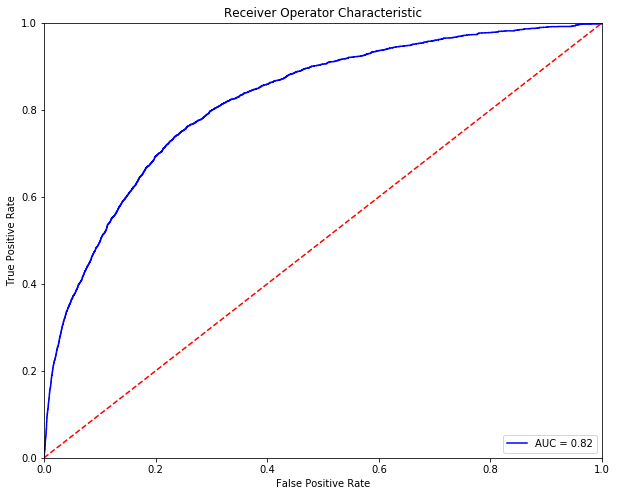

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     39888
           1       0.24      0.29      0.26      2794

    accuracy                           0.89     42682
   macro avg       0.59      0.61      0.60     42682
weighted avg       0.90      0.89      0.90     42682

[[37331  2557]
 [ 1994   800]]


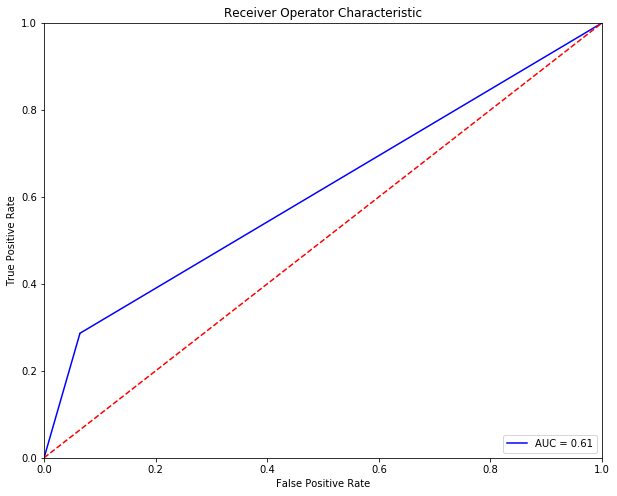

----------------------------------------------------------
Random Forest


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96     39888
           1       0.44      0.21      0.28      2794

    accuracy                           0.93     42682
   macro avg       0.69      0.59      0.62     42682
weighted avg       0.91      0.93      0.92     42682

[[39149   739]
 [ 2215   579]]


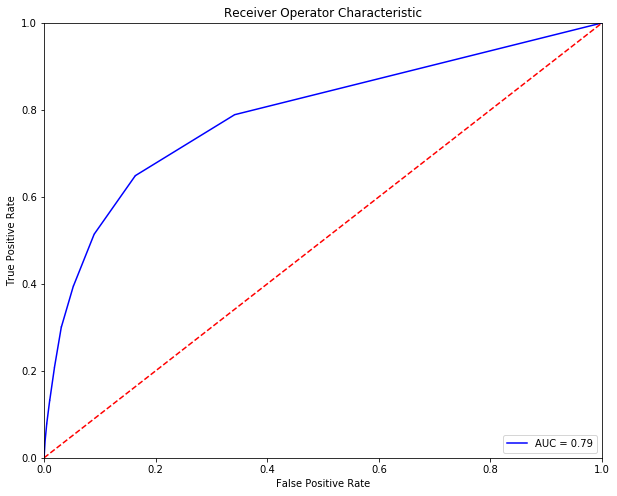

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     39888
           1       0.46      0.33      0.38      2794

    accuracy                           0.93     42682
   macro avg       0.71      0.65      0.67     42682
weighted avg       0.92      0.93      0.93     42682

[[38806  1082]
 [ 1880   914]]


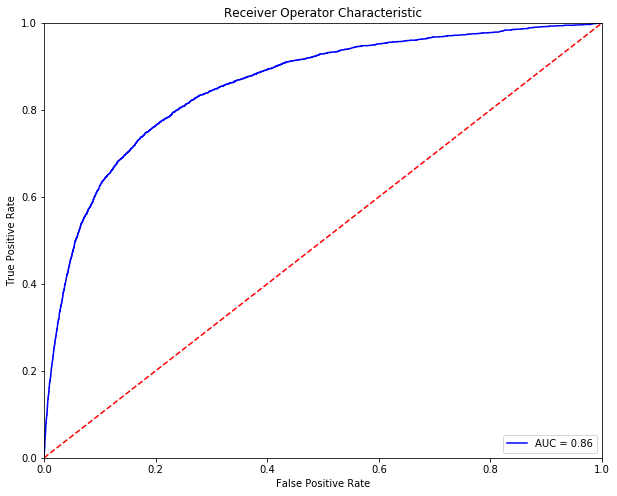

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     39888
           1       0.48      0.29      0.37      2794

    accuracy                           0.93     42682
   macro avg       0.72      0.64      0.67     42682
weighted avg       0.92      0.93      0.93     42682

[[39013   875]
 [ 1972   822]]


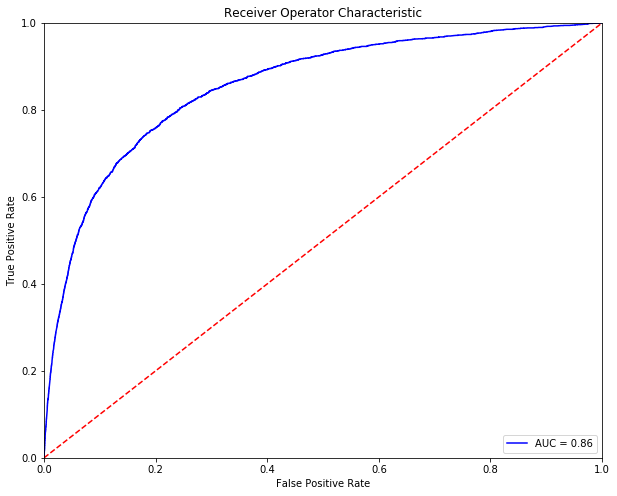

----------------------------------------------------------
logistic


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.87      0.92     33561
           1       0.25      0.58      0.35      2520

    accuracy                           0.85     36081
   macro avg       0.61      0.73      0.63     36081
weighted avg       0.92      0.85      0.88     36081

[[29195  4366]
 [ 1057  1463]]


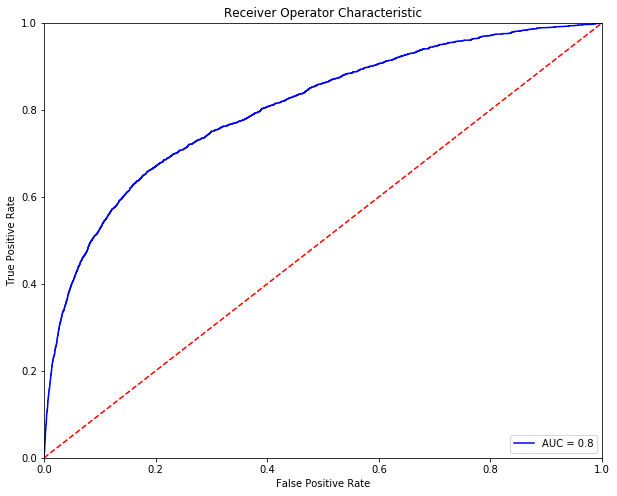

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     33561
           1       0.23      0.29      0.25      2520

    accuracy                           0.88     36081
   macro avg       0.59      0.61      0.60     36081
weighted avg       0.90      0.88      0.89     36081

[[31126  2435]
 [ 1800   720]]


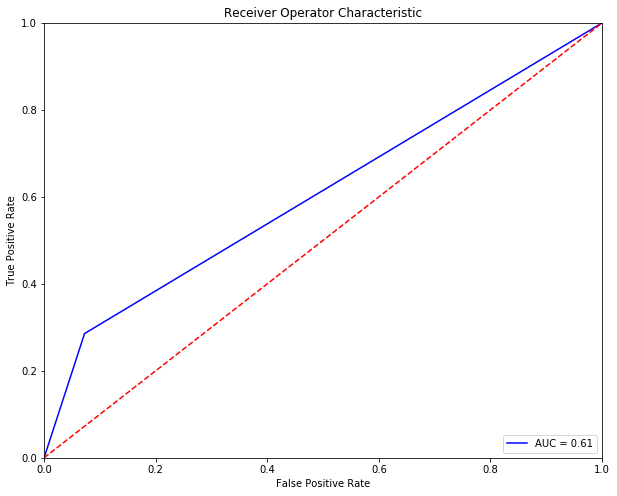

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     33561
           1       0.48      0.23      0.31      2520

    accuracy                           0.93     36081
   macro avg       0.71      0.60      0.64     36081
weighted avg       0.91      0.93      0.92     36081

[[32940   621]
 [ 1948   572]]


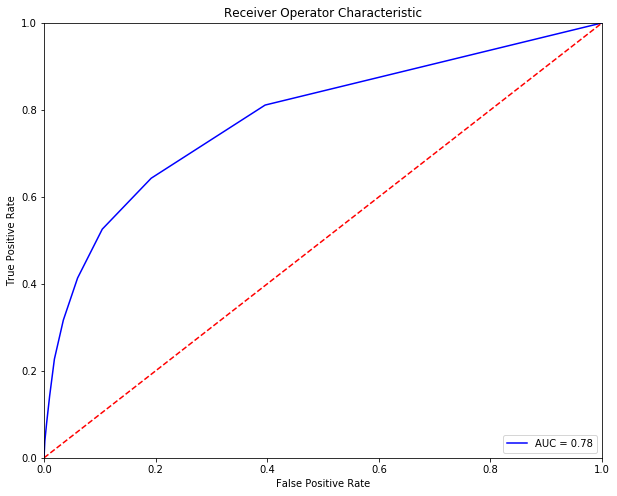

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     33561
           1       0.49      0.29      0.36      2520

    accuracy                           0.93     36081
   macro avg       0.72      0.63      0.66     36081
weighted avg       0.92      0.93      0.92     36081

[[32796   765]
 [ 1791   729]]


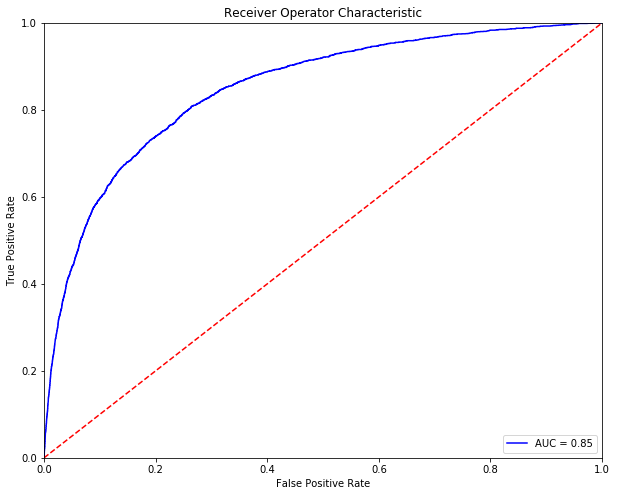

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     33561
           1       0.48      0.29      0.36      2520

    accuracy                           0.93     36081
   macro avg       0.71      0.63      0.66     36081
weighted avg       0.92      0.93      0.92     36081

[[32759   802]
 [ 1786   734]]


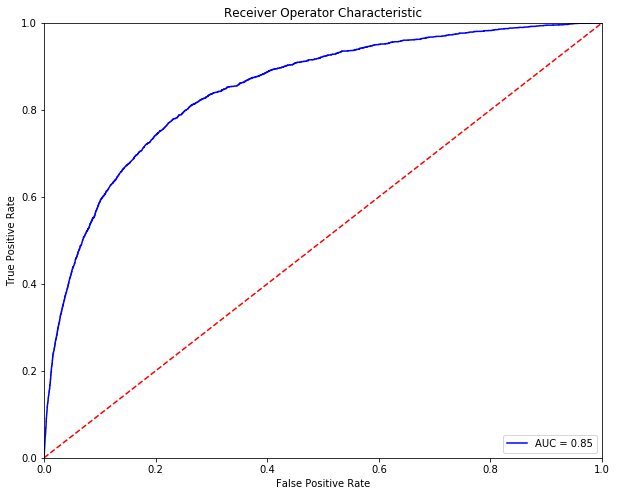

----------------------------------------------------------
logistic


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.83      0.90     39766
           1       0.23      0.72      0.35      2835

    accuracy                           0.83     42601
   macro avg       0.61      0.77      0.63     42601
weighted avg       0.93      0.83      0.86     42601

[[33140  6626]
 [  807  2028]]


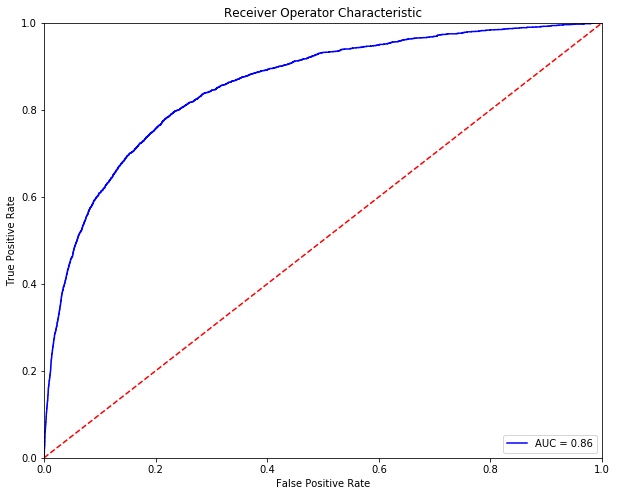

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     39766
           1       0.24      0.28      0.26      2835

    accuracy                           0.89     42601
   macro avg       0.59      0.61      0.60     42601
weighted avg       0.90      0.89      0.90     42601

[[37228  2538]
 [ 2033   802]]


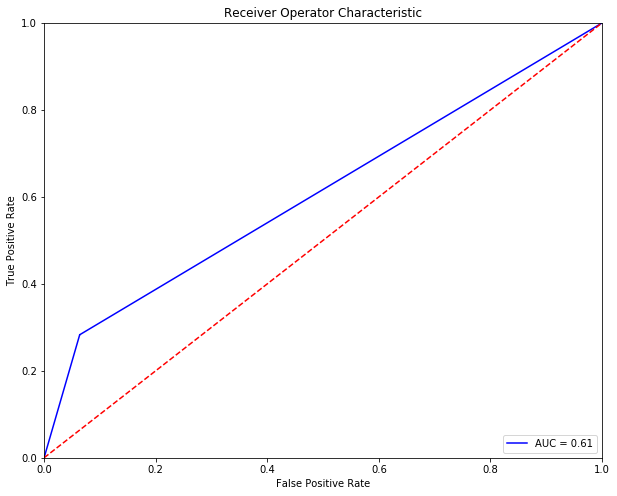

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     39766
           1       0.42      0.20      0.27      2835

    accuracy                           0.93     42601
   macro avg       0.68      0.59      0.62     42601
weighted avg       0.91      0.93      0.92     42601

[[38976   790]
 [ 2258   577]]


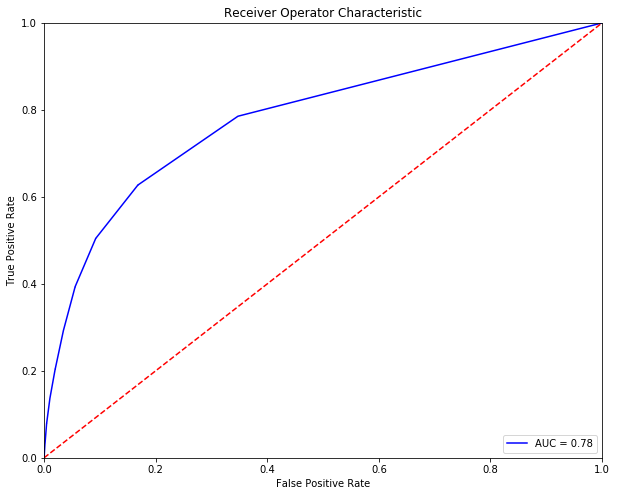

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     39766
           1       0.45      0.32      0.37      2835

    accuracy                           0.93     42601
   macro avg       0.70      0.65      0.67     42601
weighted avg       0.92      0.93      0.92     42601

[[38653  1113]
 [ 1926   909]]


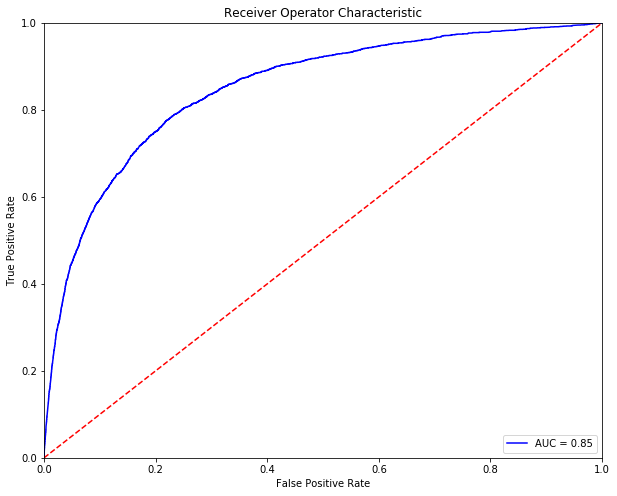

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     39766
           1       0.48      0.29      0.36      2835

    accuracy                           0.93     42601
   macro avg       0.71      0.64      0.66     42601
weighted avg       0.92      0.93      0.92     42601

[[38854   912]
 [ 2003   832]]


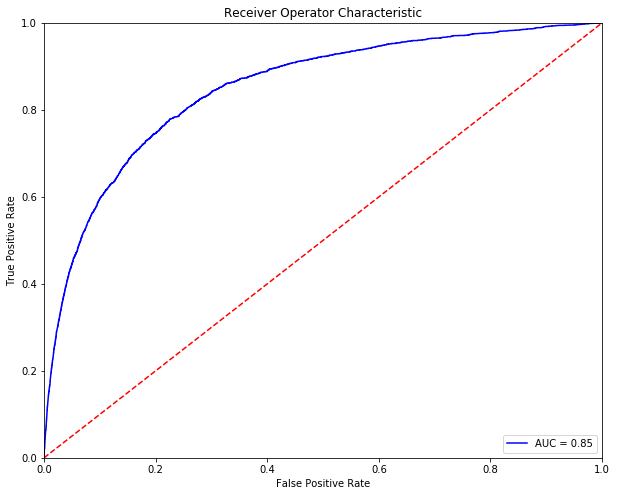

----------------------------------------------------------
logistic


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.82      0.89     29110
           1       0.24      0.73      0.36      2243

    accuracy                           0.81     31353
   macro avg       0.61      0.77      0.63     31353
weighted avg       0.92      0.81      0.85     31353

[[23899  5211]
 [  609  1634]]


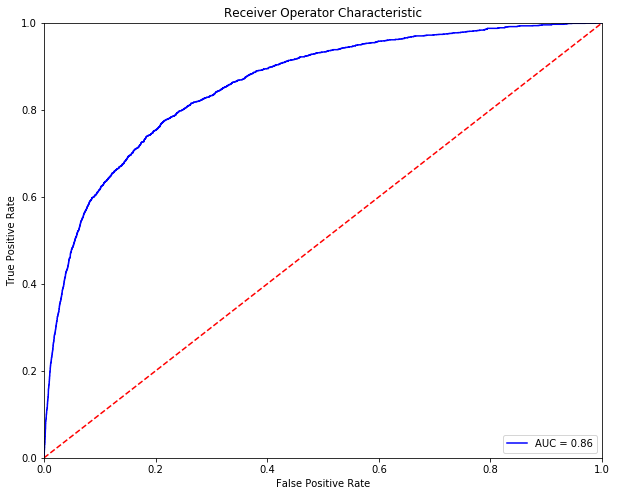

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     29110
           1       0.23      0.27      0.25      2243

    accuracy                           0.88     31353
   macro avg       0.59      0.60      0.59     31353
weighted avg       0.89      0.88      0.89     31353

[[27097  2013]
 [ 1637   606]]


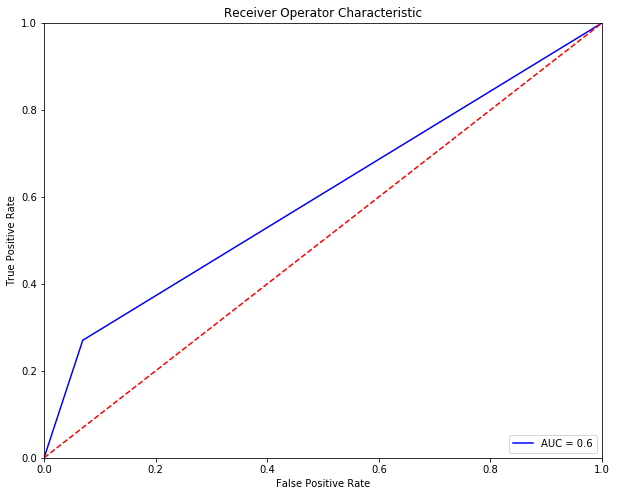

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     29110
           1       0.45      0.20      0.28      2243

    accuracy                           0.93     31353
   macro avg       0.70      0.59      0.62     31353
weighted avg       0.91      0.93      0.91     31353

[[28563   547]
 [ 1794   449]]


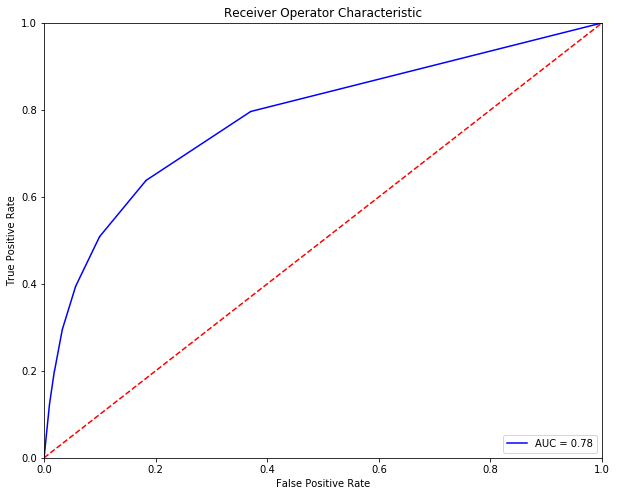

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     29110
           1       0.50      0.30      0.37      2243

    accuracy                           0.93     31353
   macro avg       0.72      0.64      0.67     31353
weighted avg       0.92      0.93      0.92     31353

[[28432   678]
 [ 1573   670]]


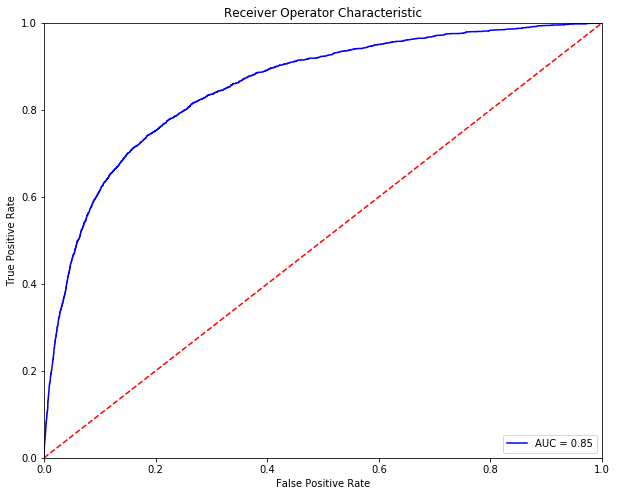

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     29110
           1       0.51      0.26      0.35      2243

    accuracy                           0.93     31353
   macro avg       0.73      0.62      0.65     31353
weighted avg       0.91      0.93      0.92     31353

[[28541   569]
 [ 1655   588]]


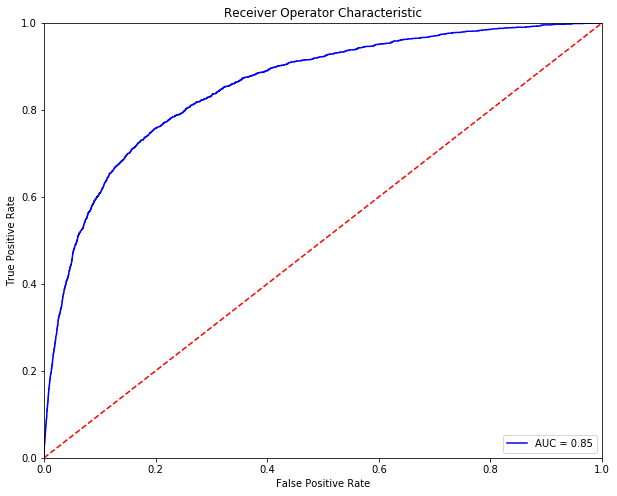

----------------------------------------------------------
logistic


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.76      0.85     28105
           1       0.17      0.72      0.28      1967

    accuracy                           0.76     30072
   macro avg       0.57      0.74      0.57     30072
weighted avg       0.92      0.76      0.82     30072

[[21320  6785]
 [  551  1416]]


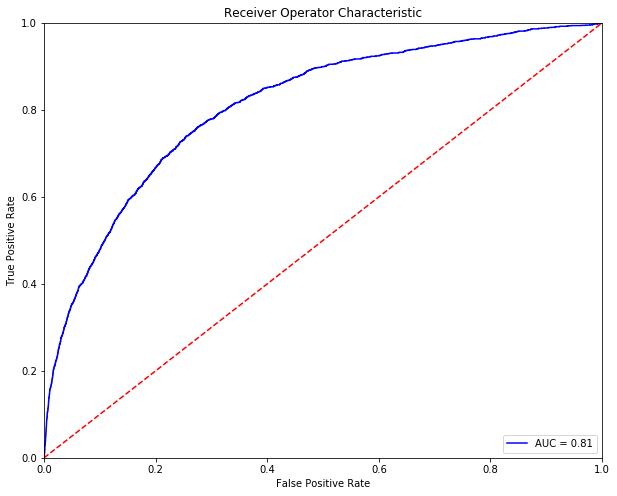

----------------------------------------------------------
decision tree
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     28105
           1       0.23      0.29      0.26      1967

    accuracy                           0.89     30072
   macro avg       0.59      0.61      0.60     30072
weighted avg       0.90      0.89      0.90     30072

[[26225  1880]
 [ 1392   575]]


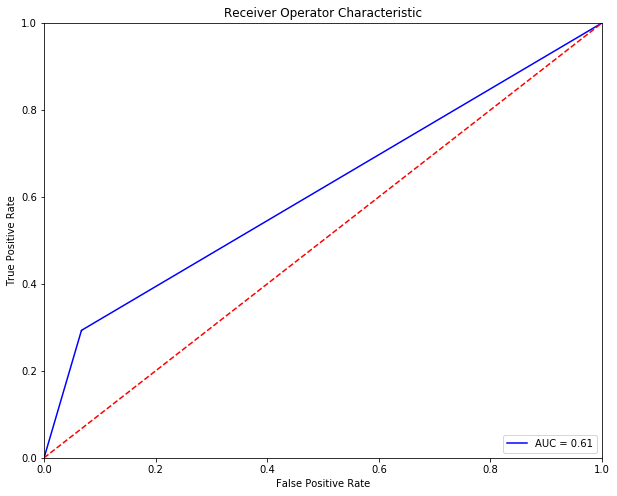

----------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     28105
           1       0.42      0.20      0.27      1967

    accuracy                           0.93     30072
   macro avg       0.68      0.59      0.62     30072
weighted avg       0.91      0.93      0.92     30072

[[27567   538]
 [ 1577   390]]


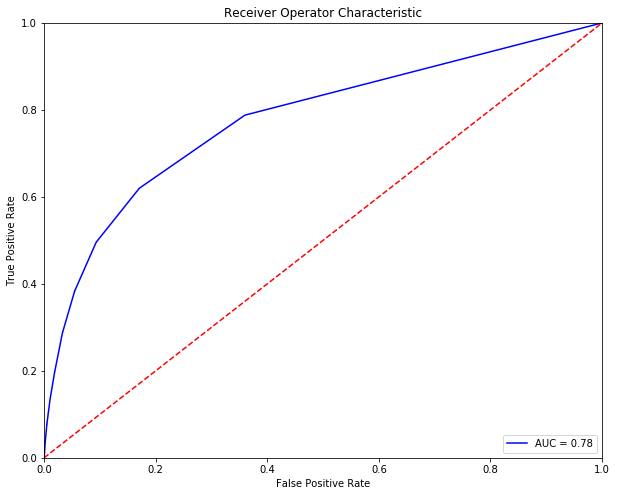

----------------------------------------------------------
GradientBoost
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28105
           1       0.45      0.31      0.36      1967

    accuracy                           0.93     30072
   macro avg       0.70      0.64      0.66     30072
weighted avg       0.92      0.93      0.92     30072

[[27384   721]
 [ 1367   600]]


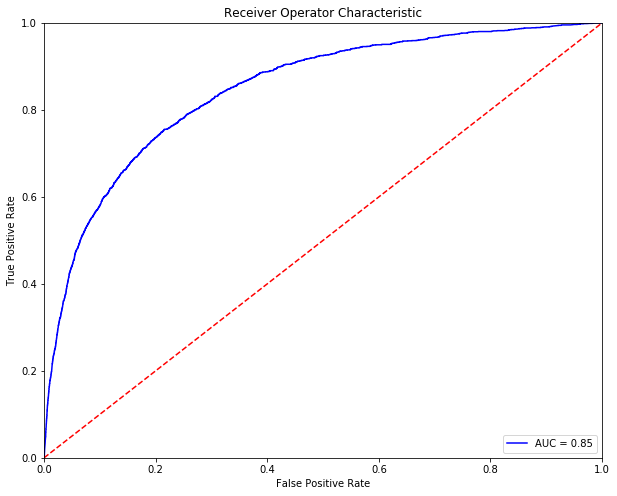

----------------------------------------------------------
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     28105
           1       0.48      0.27      0.34      1967

    accuracy                           0.93     30072
   macro avg       0.71      0.62      0.65     30072
weighted avg       0.92      0.93      0.92     30072

[[27530   575]
 [ 1445   522]]


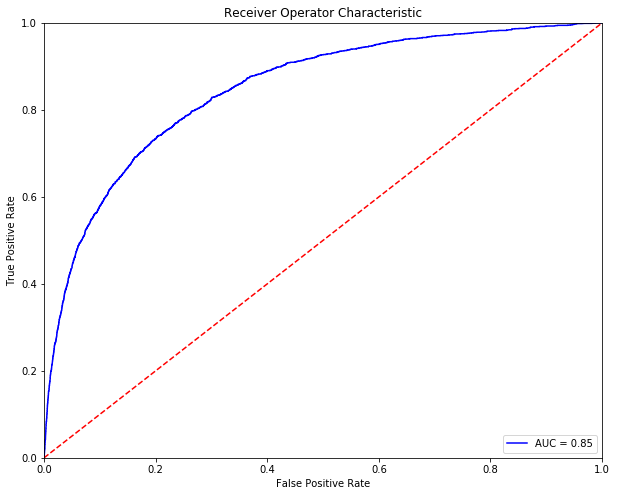

----------------------------------------------------------


In [106]:
gabungan=[['logistic',LogisticRegression()],['decision tree', DecisionTreeClassifier()],
          ['Random Forest',RandomForestClassifier()],['GradientBoost',GradientBoostingClassifier()],['XGBoost',XGBClassifier()] ]
all_data=[['data1',data],['data2',data2],['data3',data3],['data4',data4],['data5',data5]]

perform=[]
for satuan in all_data:
    X = satuan[1].drop('SeriousDlqin2yrs',axis=1)
    target = satuan[1]['SeriousDlqin2yrs']
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)
    
    # SMOTE to make the unbalanced data become balanced
    from imblearn.over_sampling import SMOTE
    sm=SMOTE(sampling_strategy='minority')

    oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
    oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
    oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)
    
    #looping the model
    for i in gabungan:
        print(i[0])
        model=i[1]
        model.fit(oversampled_trainX,oversampled_trainY)
        predict=model.predict(X_test)
        predict_proba=model.predict_proba(X_test)
        print(classification_report(y_test,predict))
        print(confusion_matrix(y_test,predict))

        preds=predict_proba[:,1]
        fpr,tpr,threshold=roc_curve(y_test,preds)
        roc_auc=auc(fpr,tpr)

        plt.figure(figsize=(10,8))
        plt.title('Receiver Operator Characteristic')
        plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

        perform.append([i[0],satuan[0],roc_auc])
        print('----------------------------------------------------------')

In [107]:
pd.DataFrame(perform, columns=['model','data','ROCAUC'])

,model,data,ROCAUC
0,logistic,data1,0.822004
1,decision tree,data1,0.611035
2,Random Forest,data1,0.789626
3,GradientBoost,data1,0.856777
4,XGBoost,data1,0.856449
5,logistic,data2,0.804023
6,decision tree,data2,0.606580
7,Random Forest,data2,0.783328
8,GradientBoost,data2,0.848949
9,XGBoost,data2,0.848590


based on the table above, XGBoost in data1 and logistic regression in data4 showing the best result. But I've cut much data in data 4 and drop the 96/98 value in the number of late times. On the other hand, the test set also has many 96/98 values in its data. So I'll go further with data 1 which represents better.

## Tuning XGBoost

In [108]:
from sklearn.metrics import roc_auc_score,mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [109]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [110]:
from bayes_opt import BayesianOptimization

In [111]:
import xgboost as xgb

In [112]:
dtrain = xgb.DMatrix(oversampled_trainX, label=oversampled_trainY)

In [113]:
dtest = xgb.DMatrix(X_test)

In [114]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 3000),
    'max_depth': (3,10),
    'subsample': (1.0, 10),  
    'colsample': (1.0, 10),  
    'gamma': (0, 5)}
 
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
 
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
 
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, oversampled_trainX, oversampled_trainY, cv=3, scoring='roc_auc'))
 
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [115]:
# optimizer.maximize(init_points=3, n_iter=10)

In [116]:
# optimizer.max

## Model Final

In [215]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.30)

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [216]:
model_final=XGBClassifier(
        max_depth=8,
        learning_rate=0.037,
        n_estimators=1310,
        gamma=4.3,
        )
# model_final=XGBClassifier()

In [217]:
model_final.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4.3,
              learning_rate=0.037, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1310, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [186]:
predict=model_final.predict(X_test)
predict_proba=model_final.predict_proba(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39792
           1       0.59      0.22      0.32      2890

    accuracy                           0.94     42682
   macro avg       0.77      0.60      0.64     42682
weighted avg       0.92      0.94      0.92     42682



In [189]:
matrix=pd.DataFrame(confusion_matrix(y_test,predict))
matrix

,0,1
0,39363,429
1,2261,629


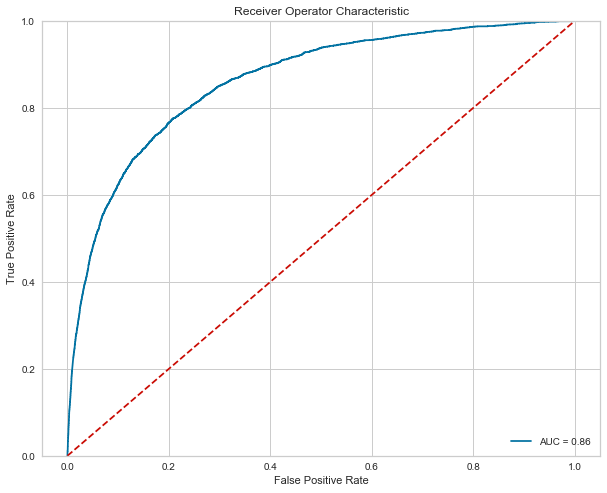

In [198]:
preds=predict_proba[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [120]:
roc_auc

0.8582615018186003

even after tuning, the model's performance still only increase 0.02 point in AUCROC. the model still has a problem to detect default case, since the recall only 0.22 while for the non-default recall is 0.99. overall, the AUC ROC is good enough with 0.86 value

## Cross Validation

In [220]:
from sklearn.model_selection import KFold
K=5
kf=KFold(n_splits=K, shuffle=True)

In [218]:
def calc_train_error(X_train, y_train, model):
    predictions=model.predict(X_train)
    predict_proba=model.predict_proba(X_train)
    matt=matthews_corrcoef(y_train, predictions)
    f1=f1_score(y_train, predictions, average='macro')
    report=classification_report(y_train, predictions)
    roc_auc=roc_auc_score(y_train, predict_proba[:,1])
    accuracy=accuracy_score(y_train, predictions)
    confMatrix=confusion_matrix(y_train, predictions)
    logloss=log_loss(y_train, predict_proba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy': accuracy,
        'confusion' : confMatrix,
        'logloss':logloss
    }

def calc_test_error(X_test, y_test, model):
    predictions=model.predict(X_test)
    predict_proba=model.predict_proba(X_test)
    matt=matthews_corrcoef(y_test, predictions)
    f1=f1_score(y_test, predictions, average='macro')
    report=classification_report(y_test, predictions)
    roc_auc=roc_auc_score(y_test, predict_proba[:,1])
    accuracy=accuracy_score(y_test, predictions)
    confMatrix=confusion_matrix(y_test, predictions)
    logloss=log_loss(y_test, predict_proba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy': accuracy,
        'confusion' : confMatrix,
        'logloss':logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error=calc_train_error(X_train, y_train, model)
    validation_error=calc_test_error(X_test, y_test, model)
    return train_error, validation_error
    

In [227]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef


In [228]:
train_errors=[]
validation_errors=[]
for train_index, val_index in kf.split(X, target):
    
    #split data
    X_train, X_test = X.iloc[train_index], X.iloc[val_index]
    y_train, y_test = target.iloc[train_index], target.iloc[val_index]
    
    #SMOTE
    sm=SMOTE(sampling_strategy='minority')
    oversampled_trainX,oversampled_trainY=sm.fit_sample(X_train,y_train)
    oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
    oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)
    
    #RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train,y_train=ros.fit_resample(oversampled_trainX, oversampled_trainY)
    
    #instantiate model
    model=model_final
    
    #calculate errors
    train_error, val_error = calc_metrics(oversampled_trainX, oversampled_trainY, X_test, y_test, model)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [229]:
df_train=pd.DataFrame(train_errors)
df_train

,accuracy,confusion,f1,logloss,matthew,report,roc
0,0.965104,"[[105215, 1014], [6400, 99829]]",0.965081,0.099593,0.931405,precision recall f1-score ...,0.991724
1,0.965888,"[[105321, 844], [6399, 99766]]",0.965865,0.097720,0.933054,precision recall f1-score ...,0.991928
2,0.964818,"[[105103, 974], [6490, 99587]]",0.964794,0.099742,0.930895,precision recall f1-score ...,0.991784
3,0.966226,"[[105169, 1021], [6152, 100038]]",0.966206,0.096132,0.933542,precision recall f1-score ...,0.992359
4,0.966490,"[[105198, 845], [6262, 99781]]",0.966468,0.097277,0.934200,precision recall f1-score ...,0.991869


In [230]:
df_val=pd.DataFrame(validation_errors)
df_val

,accuracy,confusion,f1,logloss,matthew,report,roc
0,0.933193,"[[26084, 363], [1538, 470]]",0.647855,0.186787,0.334742,precision recall f1-score ...,0.865609
1,0.933858,"[[26176, 335], [1547, 396]]",0.630742,0.186282,0.304786,precision recall f1-score ...,0.858592
2,0.937548,"[[26270, 329], [1448, 407]]",0.640725,0.181672,0.321985,precision recall f1-score ...,0.856758
3,0.933858,"[[26137, 349], [1533, 435]]",0.640691,0.187095,0.322202,precision recall f1-score ...,0.859274
4,0.938673,"[[26325, 308], [1437, 384]]",0.636765,0.177362,0.316674,precision recall f1-score ...,0.861420


In [231]:
model_evaluation=[]
for i in range(len(validation_errors)):
    a=[df_train['accuracy'].iloc[i], df_val['accuracy'].iloc[i],
      df_train['roc'].iloc[i], df_val['roc'].iloc[i],
      df_train['f1'].iloc[i], df_val['f1'].iloc[i],
      df_train['matthew'].iloc[i], df_val['matthew'].iloc[i],
      df_train['logloss'].iloc[i], df_val['logloss'].iloc[i],
      ]
    model_evaluation.append(a)
    df_evaluation=pd.DataFrame(model_evaluation, columns=["Train Accuracy",'Test Accuracy','Train ROC AUC','Test ROC AUC',
                                                'Train F1 Score','Test F1 Score','Train Matthews Corr Coef','Test Matthews Corr Coef',
                                                'Train Log Loss','Test Log Loss'])

In [232]:
df_evaluation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.965104,0.933193,0.991724,0.865609,0.965081,0.647855,0.931405,0.334742,0.099593,0.186787
1,0.965888,0.933858,0.991928,0.858592,0.965865,0.630742,0.933054,0.304786,0.097720,0.186282
2,0.964818,0.937548,0.991784,0.856758,0.964794,0.640725,0.930895,0.321985,0.099742,0.181672
3,0.966226,0.933858,0.992359,0.859274,0.966206,0.640691,0.933542,0.322202,0.096132,0.187095
4,0.966490,0.938673,0.991869,0.861420,0.966468,0.636765,0.934200,0.316674,0.097277,0.177362


In [233]:
avg_acc_train=df_evaluation['Train Accuracy'].sum()/df_evaluation['Train Accuracy'].count()
avg_acc_test=df_evaluation['Test Accuracy'].sum()/df_evaluation['Test Accuracy'].count()
avg_roc_train=df_evaluation['Train ROC AUC'].sum()/df_evaluation['Train ROC AUC'].count()
avg_roc_test=df_evaluation['Test ROC AUC'].sum()/df_evaluation['Test ROC AUC'].count()

In [234]:
print('Avg Accuracy Train : {}'.format(avg_acc_train))
print('Avg Accuracy Validation : {}'.format(avg_acc_test))
print('Avg ROC AUC Train : {}'.format(avg_roc_train))
print('Avg ROC AUC Validation : {}'.format(avg_roc_test))

Avg Accuracy Train : 0.9657050694463326
Avg Accuracy Validation : 0.9354260687934175
Avg ROC AUC Train : 0.9919331286675979
Avg ROC AUC Validation : 0.8603305865216935


In [237]:
for k in df_val['report']:
    print (k)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26447
           1       0.56      0.23      0.33      2008

    accuracy                           0.93     28455
   macro avg       0.75      0.61      0.65     28455
weighted avg       0.92      0.93      0.92     28455

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     26511
           1       0.54      0.20      0.30      1943

    accuracy                           0.93     28454
   macro avg       0.74      0.60      0.63     28454
weighted avg       0.92      0.93      0.92     28454

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26599
           1       0.55      0.22      0.31      1855

    accuracy                           0.94     28454
   macro avg       0.75      0.60      0.64     28454
weighted avg       0.92      0.94      0.92     28454

              preci

from the evaluation above, the accuracy is really good with 0.93 but the main problem is in imbalance dataset, accuracy is useless since even if the model predict all value with class 0, the model still gets good accuracy due to less amount of class 1. so let's drop accuracy from our consideration.
AUC ROC is good enough with 0.86 but if we look deeper in confusion matrix, the final model still struggling to predict the 1 class (default case)
the model needs to be improved more maybe using more feature engineering, aggregation, other models, or different sampling method.

## Feature Importance

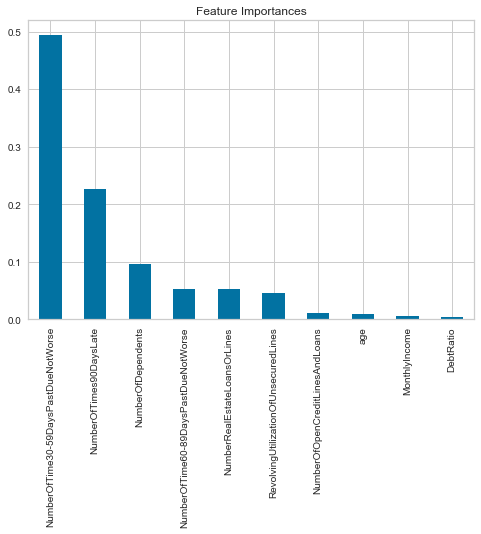

In [235]:
coef=pd.Series(model_final.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

number of late, number of dependents, number of real estate loans and RUUL is the most important feature for distinguishing the class.

# Deploy Model

## Re-train with all data

In [204]:
X = data.drop('SeriousDlqin2yrs',axis=1)
target = data['SeriousDlqin2yrs']

# SMOTE to make the unbalanced data become balanced
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY=sm.fit_sample(X,target)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)],axis=1)
oversampled_trainX=pd.DataFrame(oversampled_trainX,columns=X_train.columns)

In [206]:
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265352 entries, 0 to 265351
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    265352 non-null float64
age                                     265352 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    265352 non-null float64
DebtRatio                               265352 non-null float64
MonthlyIncome                           265352 non-null float64
NumberOfOpenCreditLinesAndLoans         265352 non-null float64
NumberOfTimes90DaysLate                 265352 non-null float64
NumberRealEstateLoansOrLines            265352 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    265352 non-null float64
NumberOfDependents                      265352 non-null float64
dtypes: float64(10)
memory usage: 20.2 MB


In [213]:
model_final.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4.3,
              learning_rate=0.037, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1310, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [214]:
import pickle
filename = 'default.sav';
pickle.dump(model_final, open(filename, 'wb'))